# 🛍️ Customer Segmentation with Clustering

## 📌 Task Overview
In this task, we aim to segment mall customers based on their income and spending behavior using unsupervised learning (clustering).

## 🎯 Objectives
- Preprocess and scale the data
- Visualize the customer data
- Apply K-Means clustering and determine the optimal number of clusters
- Visualize resulting clusters


## Required Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [15]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Check for Missing Values
Before proceeding with clustering, it's important to ensure the dataset is clean and free of missing values. In this step, we'll check if any column contains null values.

We expect to see zeros across all columns, which would confirm the data is ready for preprocessing and modeling.

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 🔎 Exploratory Data Analysis

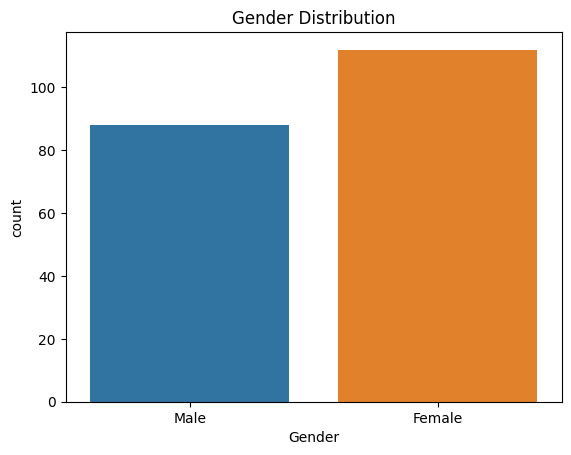

In [34]:
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

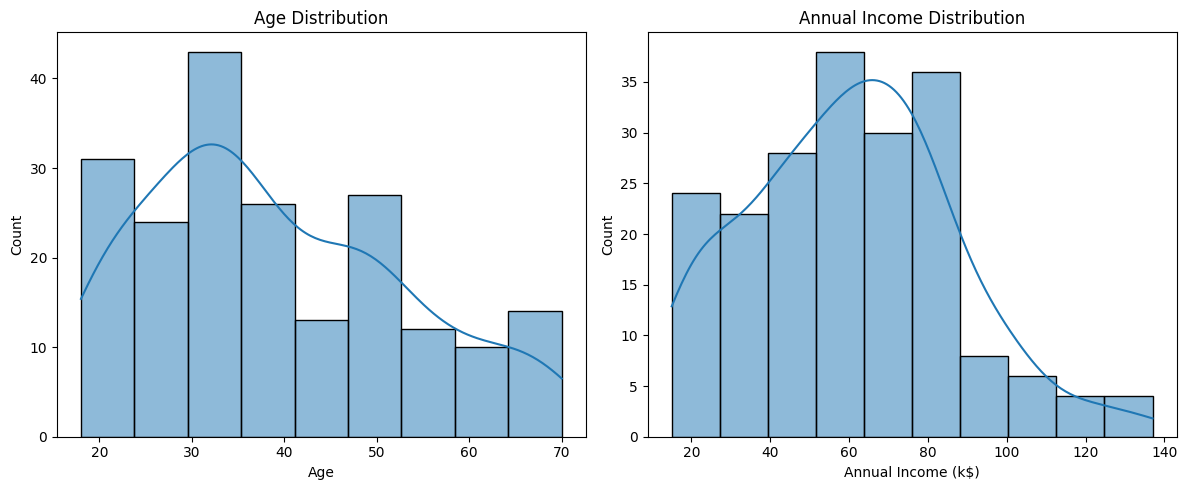

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Age'], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axs[1])
axs[1].set_title("Annual Income Distribution")
plt.tight_layout()
plt.show()

## Feature Scaling

Before applying clustering algorithms like **K-Means**, it is important to scale the data, especially when features have different units or ranges. 

For example, in this dataset:
- **Annual Income (k$)** ranges from 15 to 137
- **Spending Score (1–100)** ranges from 1 to 100

If we don’t scale the data:
- Features with larger ranges (like income) may dominate the distance calculations.
- This leads to biased clustering results.

We use **Min-Max Scaling** to normalize the features to a range of **[0, 1]**, ensuring that all features contribute equally to the clustering process.

We will now scale the features using `MinMaxScaler` from `sklearn.preprocessing`.

In [10]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(df_scaled[['Annual Income (k$)','Spending Score (1-100)']])
df_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


## Visualizing Income and Spending Score

To gain insights into the distribution of customers, we visualize their **Annual Income** versus **Spending Score**.

This scatter plot helps us understand how customers are grouped based on their spending behavior relative to their income.

- We might notice natural clusters or groupings that suggest different customer segments.

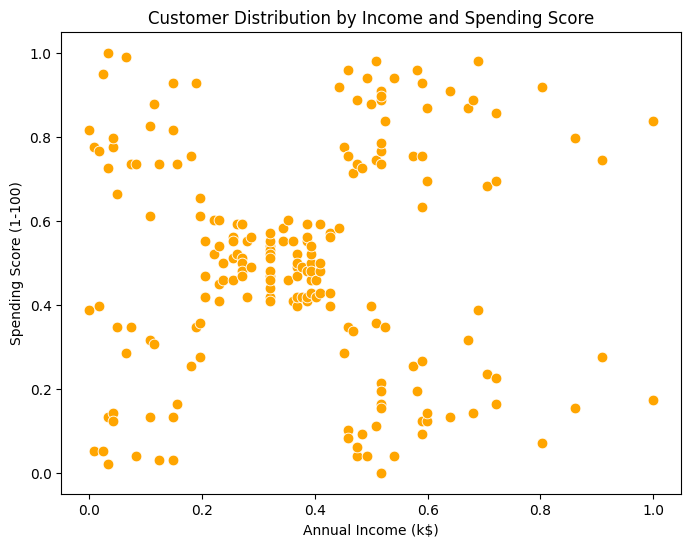

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)' , y= 'Spending Score (1-100)' , data = df_scaled , s=60 , color='orange')
plt.title('Customer Distribution by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Determine Optimal K using the Elbow Method
To find the optimal number of clusters for K-Means, we apply the Elbow Method. This involves:

Running K-Means clustering on the dataset for a range of values for K (e.g., 1 to 10).

Calculating the Within-Cluster Sum of Squares (WCSS) for each K.

Plotting the WCSS values against K.

Identifying the "elbow point" in the plot — the value of K where the WCSS starts to diminish more slowly.
This point suggests a suitable trade-off between model complexity and performance.

The "elbow" represents the point where adding more clusters doesn't significantly improve the model fit.

In [19]:
k_rng = range(1,10)
wcss = []
for k in k_rng:
    km = KMeans(n_clusters = k , random_state=42)
    km.fit(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(km.inertia_)

wcss

[23.040720326039906,
 13.993505283127977,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.098385141882586,
 2.624103948396721,
 2.2180573120830713,
 1.873434667867071]

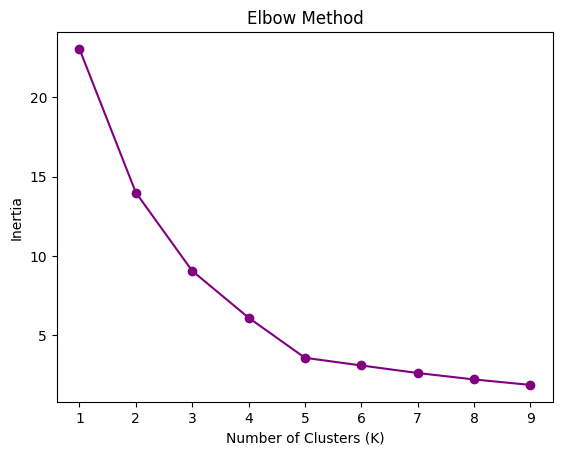

In [21]:
plt.plot(k_rng , wcss , marker = 'o' , color='purple')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

## Optimal K Value: K = 5
After applying the Elbow Method, we observe that the curve begins to flatten significantly at K = 5, indicating the optimal number of clusters.

Opting for K = 5 strikes an effective balance between computational efficiency and clustering precision. This choice results in a noteworthy decrease in the Within-Cluster Sum of Squares (WCSS), suggesting that adding more clusters beyond this point provides diminishing returns in terms of variance reduction.

Thus, we proceed with K = 5 for the K-Means clustering task.

## 🧩 K-Means Clustering

In [22]:
km = KMeans(n_clusters = 5 , random_state=42)
y_predicted = km.fit_predict(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled['cluster'] = y_predicted

In [23]:
df_scaled.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,2
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,2
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,2
5,6,Female,22,0.016393,0.765306,3
6,7,Female,35,0.024590,0.051020,2
7,8,Female,23,0.024590,0.948980,3
8,9,Male,64,0.032787,0.020408,2
9,10,Female,30,0.032787,0.724490,3


## Cluster Visualization

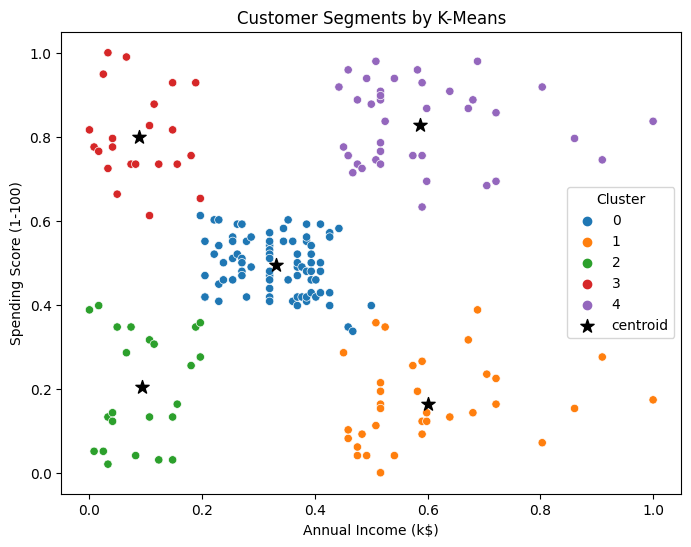

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1] , color='black' ,s = 100 , marker= '*', label='centroid')
plt.title("Customer Segments by K-Means")
plt.legend(title='Cluster')
plt.show()